In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [26]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # 禁用換行

inbody_df = pd.read_csv('inbody.csv')
train_df = pd.read_csv('Train.csv')

In [27]:
#檢查離奇數值
col_filter = 'Muscle_Mass'
std_range = 3
std_value = inbody_df[col_filter].std()
mean_value = inbody_df[col_filter].mean()
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)

inbody_df.loc[errorData.index,col_filter] = None
errorData = inbody_df[abs(inbody_df[col_filter] - mean_value) > std_range * std_value]
print(errorData)


      Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage   BMI  Visceral_Fat
187  11/12    62.5         17.4      13.6                 21.7  23.5           5.0
Empty DataFrame
Columns: [Date, Weight, Muscle_Mass, Body_Fat, Body_Fat_Percentage, BMI, Visceral_Fat]
Index: []


In [28]:


inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊
inbody_df = inbody_df2
print(inbody_df.head(30))

#轉化為每周
print(train_df.head(10))

     Date     Weight  Muscle_Mass   Body_Fat  Body_Fat_Percentage        BMI  Visceral_Fat
0   05/09  67.200000        28.50  16.100000               23.900  25.300000      6.000000
1   05/10  66.900000        28.30  16.400000               24.500  25.200000      6.000000
2   05/11  66.700000        27.90  16.900000               25.400  25.100000      6.000000
3   05/12  66.700000        28.70  15.600000               23.400  25.100000      6.000000
4   05/13  67.250000        28.40  16.700000               24.800  25.300000      6.500000
5   05/14  67.800000        28.10  17.800000               26.200  25.500000      7.000000
6   05/15  67.300000        28.90  15.800000               23.500  25.300000      6.000000
7   05/16  67.000000        28.35  16.450000               24.600  25.200000      6.500000
8   05/17  66.700000        27.80  17.100000               25.700  25.100000      7.000000
9   05/18  67.300000        29.20  15.400000               22.900  25.300000      6.000000

C:\Users\user\AppData\Local\Temp\ipykernel_17728\1014012310.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  inbody_df2 = inbody_df.interpolate(method='linear', axis=0)#內插資訊


In [29]:
#正規化
def normalize_dataframe(df, col):
    to_normalize = scaler.fit_transform(df[[col]]) 
    df[col] = to_normalize

scaler = MinMaxScaler()
print(inbody_df.keys)

normalize = inbody_df
normalize_dataframe(normalize,'Weight')
normalize_dataframe(normalize,'Muscle_Mass')
normalize_dataframe(normalize,'Body_Fat')
normalize_dataframe(normalize,'Body_Fat_Percentage')
normalize_dataframe(normalize,'BMI')
normalize_dataframe(normalize,'Visceral_Fat')
print(normalize)


<bound method NDFrame.keys of       Date  Weight  Muscle_Mass  Body_Fat  Body_Fat_Percentage   BMI  Visceral_Fat
0    05/09   67.20         28.5      16.1                 23.9  25.3           6.0
1    05/10   66.90         28.3      16.4                 24.5  25.2           6.0
2    05/11   66.70         27.9      16.9                 25.4  25.1           6.0
3    05/12   66.70         28.7      15.6                 23.4  25.1           6.0
4    05/13   67.25         28.4      16.7                 24.8  25.3           6.5
..     ...     ...          ...       ...                  ...   ...           ...
216  12/11   62.50         27.7      13.0                 20.8  23.5           5.0
217  12/12   62.50         27.7      13.0                 20.8  23.5           5.0
218  12/13   62.50         27.7      13.0                 20.8  23.5           5.0
219  12/14   62.50         27.7      13.0                 20.8  23.5           5.0
220  12/15   62.50         27.7      13.0                

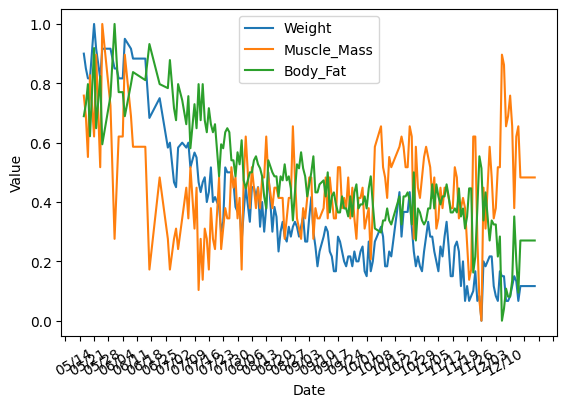

In [30]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator , MonthLocator

fig, ax = plt.subplots()
#inbody_df['Date'] = pd.to_datetime(inbody_df['Date'])
#inbody_df['Date'] = inbody_df['Date'].apply(lambda x: x.replace(year=2023))
x = inbody_df["Date"]

# 设置 x 轴主刻度为每周
ax.xaxis.set_major_locator(WeekdayLocator())

def plot_by_label(col):
    ax.plot(x,normalize[col],label=col)

plot_by_label('Weight')
plot_by_label('Muscle_Mass')
plot_by_label('Body_Fat')
#plot_by_label('Body_Fat_Percentage')
#plot_by_label('BMI')
#plot_by_label('Visceral_Fat')

# 添加图例
ax.legend()

# 添加 x 轴和 y 轴标签
plt.xlabel("Date")
plt.ylabel("Value")

# 自动调整日期标签以防止重叠
fig.autofmt_xdate()

# 显示图形
plt.show()


In [31]:
//todo 加入訓練量

# 加入後跑這個 找出比較有關係表的參數 獨立出來
# tips = sns.load_dataset("iris")
# g = sns.PairGrid(tips)
# g.map(plt.scatter);

SyntaxError: invalid syntax (787116349.py, line 1)